In [19]:
import geopandas as gpd

In [8]:
# geojson containing chennai zones outlines
chennai_zones = gpd.read_file("chennai_zones.geojson")

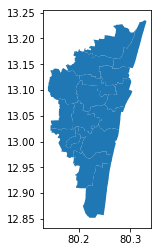

In [22]:
chennai_zones.plot()

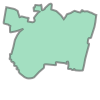

In [176]:
# Zone 13 outline - velachery
zone13 = chennai_zones.geometry[13]
zone13

In [177]:
zone13.bounds

(80.19823222330123, 12.9672590490807, 80.27811455099413, 13.031738065033446)

In [178]:
# Water sources in the city of chennai
chennai_water = gpd.read_file("chennai_water.geojson")

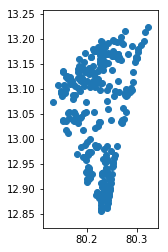

In [179]:
chennai_water.plot()

In [180]:
chennai_water.head()

,Name,description,S_No_,Zone,Ward,Latitude,Longitude,Owned_By,Area__in_acres_,DPR_Status,DPR,Adopted_Being_Restored_by,id,geometry
0,Thamaraikulam Kathivakkam Village,S.No.: 1<br>Zone: 1<br>Ward: 1<br>Latitude: 13...,1.0,1,1,"13°13'24.2""N","80°19'23.5""E",Greater Chennai Corporation,4.4,1.0,Kosasthalaiyar Basin,Environmentalist Foundation of India,0,POINT (80.3231944444444 13.2233888888889)
1,Railway Pond 2,S.No.: 2<br>Zone: 1<br>Ward: 3<br>Latitude: 13...,2.0,1,3,"13°11'44.9""N","80°18'51.3""E",Greater Chennai Corporation,24.3,1.0,Kosasthalaiyar Basin,-,1,POINT (80.31381679115081 13.19592662530592)
2,Railway Pond 1,S.No.: 3<br>Zone: 1<br>Ward: 4<br>Latitude: 13...,3.0,1,4,"13°11'19.0""N","80°18'31.3""E",Greater Chennai Corporation,7.0,1.0,Kosasthalaiyar Basin,-,2,POINT (80.30888112041738 13.18846369570318)
3,Railway Pond 3,S.No.: 4<br>Zone: 1<br>Ward: 6<br>Latitude: 13...,4.0,1,6,"13°10'24.4""N","80°18'09.1""E",Greater Chennai Corporation,1.0,1.0,Kosasthalaiyar Basin,-,3,POINT (80.3025277777778 13.1734444444444)
4,Sathankadu lake,S.No.: 5<br>Zone: 1<br>Ward: 7<br>Latitude: 13...,5.0,1,7,"13°09'26.0""N","80°16'07.5""E",Greater Chennai Corporation,63.0,0.0,-,-,4,POINT (80.26875 13.1572222222222)


In [181]:
from osmxtract import overpass

In [182]:
def get_geojson(bounds):
    query = overpass.ql_query(bounds, tag='building')
    response = overpass.request(query)
    return(response)

In [217]:
new_bound = (zone13.bounds[1],zone13.bounds[0],zone13.bounds[3],zone13.bounds[2])

In [240]:
buildings= get_geojson(new_bound)

In [241]:
buildings = overpass.as_geojson(buildings,"polygon")

In [242]:
buildings = gpd.GeoDataFrame.from_features(buildings)

In [243]:
bound_gdframe = gpd.GeoDataFrame({'geometry': [zone13]})

In [244]:
buildings = buildings[:10000]

In [245]:
buildings_in_zone13 = gpd.overlay(buildings, bound_gdframe, how='intersection')

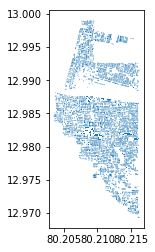

In [246]:
buildings_in_zone13.plot()